<div style="position:relative; height:160px;">
<img src="logoDECATUFS.png" width="500" height="500" style="position:absolute; left:-8px;">
</div>

<div style="text-align:center;font-size:17px; white-space:pre;margin-top:-35px">
        <h3>             Modelos Lineares Generalizados</h3>
        Disciplina ofertada pelo DECAT/UFS
        Código: ESTAT0092
        Nível: Graduação
        Carga horária: 60h
        Período: 2020.2
        Professor responsável e ministrante: Luiz Henrique Dore
        <h3>            Aulas 5 e 6: estimação pelo método da máxima verossimilhança</h3>
</div>

# Exemplo 8

<p style="text-align: justify; font-size:16px">
Considere o conjunto de dados <b>icu.csv</b>, descrito no exemplo 3 da aula 2. O objetivo é ajustar um modelo de regressão logística, no qual a variável resposta é a variável <b>sta</b> (Sobrevivência) e a variável preditora é a variável <b>age</b> (Idade).
<p>

### 8.1 Leitura e visualização dos dados

In [1]:
dados<-read.csv("/Dados/Google_Drive_UFS/Aulas/2020_2/MLG/Dados/icu.csv",header=TRUE)
n<-dim(dados)[1] #Número de observações
p<-dim(dados)[2]+1 #Número de coeficientes (incluindo o intercepto)
head(dados) #Visualizando as primeiras observações

,id,sta,age,gender,race,ser,can,crn,inf,cpr,⋯,hra,pre,type,fra,po2,ph,pco,bic,cre,loc
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,4,Died,87,Female,White,Surgical,No,No,Yes,No,⋯,96,No,Emergency,Yes,<= 60,< 7.25,> 45,>= 18,<= 2.0,Nothing
2,8,Lived,27,Female,White,Medical,No,No,Yes,No,⋯,88,No,Emergency,No,> 60,>= 7.25,<= 45,>= 18,<= 2.0,Nothing
3,12,Lived,59,Male,White,Medical,No,No,No,No,⋯,80,Yes,Emergency,No,> 60,>= 7.25,<= 45,>= 18,<= 2.0,Nothing
4,14,Lived,77,Male,White,Surgical,No,No,No,No,⋯,70,No,Elective,No,> 60,>= 7.25,<= 45,>= 18,<= 2.0,Nothing
5,27,Died,76,Female,White,Surgical,No,No,Yes,No,⋯,90,Yes,Emergency,No,> 60,>= 7.25,<= 45,>= 18,<= 2.0,Nothing
6,28,Lived,54,Male,White,Medical,No,No,Yes,No,⋯,103,No,Emergency,Yes,> 60,>= 7.25,<= 45,>= 18,<= 2.0,Nothing


In [2]:
sta<-dados[,"sta"]=="Lived"
age<-dados[,3]

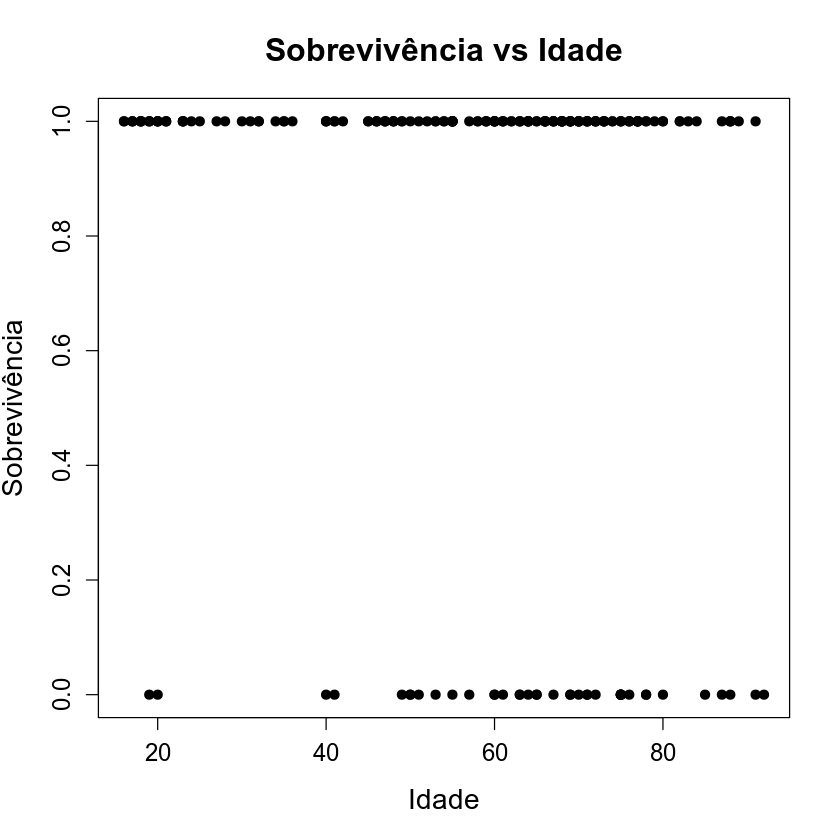

In [3]:
plot(age,sta,pch=20,cex=1.5,xlab="Idade",ylab="Sobrevivência",cex.lab=1.4,cex.main=1.6,main="Sobrevivência vs Idade",cex.axis=1.2)

<p style="text-align: justify;font-size: 16px">Agrupando por faixa etária, conforme explicado no exemplo 3 da aula 2.</p>

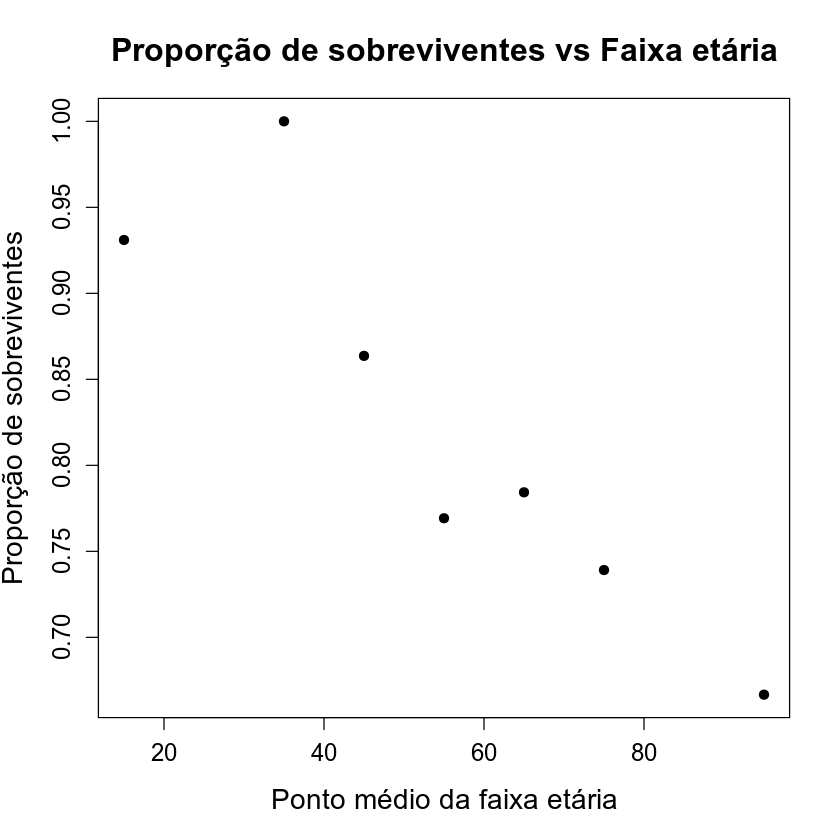

In [4]:
b<-c(0,30,40,50,60,70,80,100) #Extremos dos intervalos: 0-30, 30-40, 40-50, 50-60, 60-70, 70-80, 80-100.
w<-findInterval(age,b) #Identifica a qual intervalo cada paciente pertence.
aux<-aggregate(dados[,"sta"]=="Lived",list(w),mean) #Calcula a proporção de sobreviventes, por intervalo.
propGroup<-as.numeric(aux[,2]) #Proporções calculadas.
ageGroup<-c(15,35,45,55,65,75,95) #Pontos médios dos intervalos.
plot(ageGroup,propGroup,pch=20,cex=1.5,xlab="Ponto médio da faixa etária",ylab="Proporção de sobreviventes",cex.lab=1.4,cex.main=1.6,main="Proporção de sobreviventes vs Faixa etária",cex.axis=1.2)

### 8.2 Formulação do modelo

<p style="text-align: justify; font-size:15px">
    <ol style="font-size:16px">
        <li>$Sobrevivência\sim Bernoulli(\mu)$;</li>
        <li>$\eta=\beta_0+\beta_1\cdot Idade$;</li>
        <li>$\ln\left(\frac{\mu}{1-\mu}\right)=\eta$.</li>
    </ol>
</p>

### 8.3 Estimação do vetor de coeficientes de regressão $\boldsymbol{\beta}$ utilizando o algoritmo escore de Fisher

<p style="text-align: justify; font-size:16px">Gerando o vetor dos valores observados da resposta e a matriz design.</p>

In [5]:
#y=1 se o paciente sobrevive (Lived) e y=0, caso contrário (Died)
y<-as.numeric(dados[,"sta"]=="Lived")
X<-as.matrix(dados[,"age"])
X<-cbind(1,X)
colnames(X)[2]<-"Idade"
head(X)

NA,Idade
1,87
1,27
1,59
1,77
1,76
1,54


<p style="text-align: justify; font-size:16px">Calculando a estimativa de máxima verossimilhança de $\boldsymbol{\beta}$ suando o algoritmo escore de Fisher.</p>

<p style="text-align: justify; font-size:16px">No caso da distribuição de Bernoulli, tem-se que $\boldsymbol{V}=\hbox{diag}\left\{\mu_1(1-\mu_1),\cdots,\mu_n(1-\mu_n)\right\}$. Como a ligação é canônica, então $\mu_i=\frac{e^{\eta_i}}{e^{\eta_i}+1}$ e $\boldsymbol{W}=\boldsymbol{V}$. A estimativa inicial para cada $\mu_1,\cdots,\mu_n$ é a proporção amostral de sobreviventes. Isto é, $\mu^{(0)}=(\bar{y},\bar{y}\cdots,\bar{y})^T$, onde $\bar{y}$ é a proporção amostral.</p>

In [6]:
mu0<-rep(mean(y),n) #Estimativa inicial para mu (vetor de médias).
eta0<-log(mu0/(1-mu0)) #Cálculo do valor inicial do vetor eta (vetor de preditores lineares)
V0<-diag(mu0*(1-mu0)) #Cálculo do valor inicial da matriz diagonal V (matriz das funções de variância)
W0<-V0 #Cálculo do valor inicial da matriz diagonal W (matriz de pesos)
V0Inv<-diag(1/(mu0*(1-mu0))) #Valor inicial da inversa de V
W0Inv<-V0Inv #Valor inicial da inversa de W
z0<-eta0+((W0Inv^(1/2))%*%(V0Inv^(1/2)))%*%(y-mu0) #Cálculo do valor inicial de z
beta0<-as.numeric(solve(t(X)%*%W0%*%X)%*%(t(X)%*%W0%*%z0)) #Cálculo do valor inicial de beta

#Bloco de iteração
iterMax<-100 #Número máximo de iterações
iter<-0
conv<-FALSE
while(1){
    iter<-iter+1
    eta0<-as.numeric(X%*%beta0)  #Atualização do valor do preditor linear
    mu0<-exp(eta0)/(exp(eta0)+1) #Atualização do valor de mu
    V0<-diag(mu0*(1-mu0)) #Atualização do valor da matriz diagonal V (matriz das funções de variância)
    W0<-V0 #Atualização do valor da matriz diagonal W (matriz das funções de pesos)
    V0Inv<-diag(1/(mu0*(1-mu0))) #Inversa da matriz diagonal V atualizada
    W0Inv<-V0Inv #Inversa da matriz diagonal W atualizada
    z0<-eta0+((W0Inv^(1/2))%*%(V0Inv^(1/2)))%*%(y-mu0) #Atualização do valor de z
    beta1<-as.numeric(solve(t(X)%*%W0%*%X)%*%(t(X)%*%W0%*%z0)) #Atualização de beta (vetor de coeficientes de regressão)
    #Critério de convergência: diferença máxima entre os compenentes de beta(m+1) e beta(m) menor do que 10e-5
    if(all(abs(beta0-beta1)<1e-5)){
        conv<-TRUE
        break
    }
    beta0<-beta1
    if(iter==iterMax){
        break
    }
}

if(conv){
    print(paste("O algoritmo escore de Fisher convergiu em",iter,"passos."))
    beta<-beta1 #Estimativa de máxima verossimilhança de beta
    names(beta)<-colnames(X)
    names(beta)[1]<-"Intercepto"
    eta<-X%*%beta #Estimativa de máxima verossimilhança de eta
    mu<-exp(eta)/(exp(eta)+1)
}
if(!conv){
    print(paste("O algoritmo escore de Fisher não convergiu em",iter,"passos."))
}

[1] "O algoritmo escore de Fisher convergiu em 4 passos."


<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão.</p>

In [7]:
print(beta)

 Intercepto       Idade 
 3.05851325 -0.02754261 


### 8.4 Estimação dos parâmetros pelo método escore de Fisher usando a função ``glm``

<p style="text-align: justify;font-size: 16px">Carregando os pacotes necessários.</p>

<p style="text-align: justify;font-size: 16px">A função <font face="'Courier New'">glm</font> realiza o ajuste de
    um MLG. Os coeficientes de regressão são estimados pelo método da máxima verossimilhança, com o algoritmo 
    escore de Fisher. O estimador do parâmetro de dispersão depende do modelo. Os argumentos mais básicos são</p>
    <ol style="text-align: justify; font-size:16px">
        <li><font face="'Courier New'">formula</font>: especificação do preditor linear;</li>
        <li><font face="'Courier New'">family</font>: especificação da distribuição de probabilidade da resposta e da função de ligação.</li>
    </ol>
<p style="text-align: justify;font-size: 16px"> Para mais informações sobre a função <font face="'Courier 
    New'">glm</font> e seus argumentos, acesse a ajuda da função executando o comando <font face="'Courier New'">?glm</font>. Para informações sobre as distribuições de probabilidade e as funções de ligação disponíveis, 
    execute o comando <font face="'Courier New'">?family</font>.
</p>

In [8]:
aj<-glm(formula=sta~age,family=binomial(link="logit"),data=dados)
beta<-aj$coefficients

<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão.</p>

In [9]:
print(beta)

(Intercept)         age 
 3.05851323 -0.02754261 


<p style="text-align: justify;font-size: 16px">Visualizando as respostas médias e os respectivos valores ajustados.</p>

In [10]:
muAj<-predict(aj,type="response") #Respostas médias ajustadas
head(cbind(sta,muAj))

,sta,muAj
1,0,0.6597783
2,1,0.9101005
3,1,0.8074460
4,1,0.7186414
5,0,0.7241767
6,1,0.8279564


<p style="text-align: justify;font-size: 16px">Visualizando a curva ajustada. Os pacientes são agrupados por faixa etária, conforme explicado no exemplo 3 da aula 2.</p>

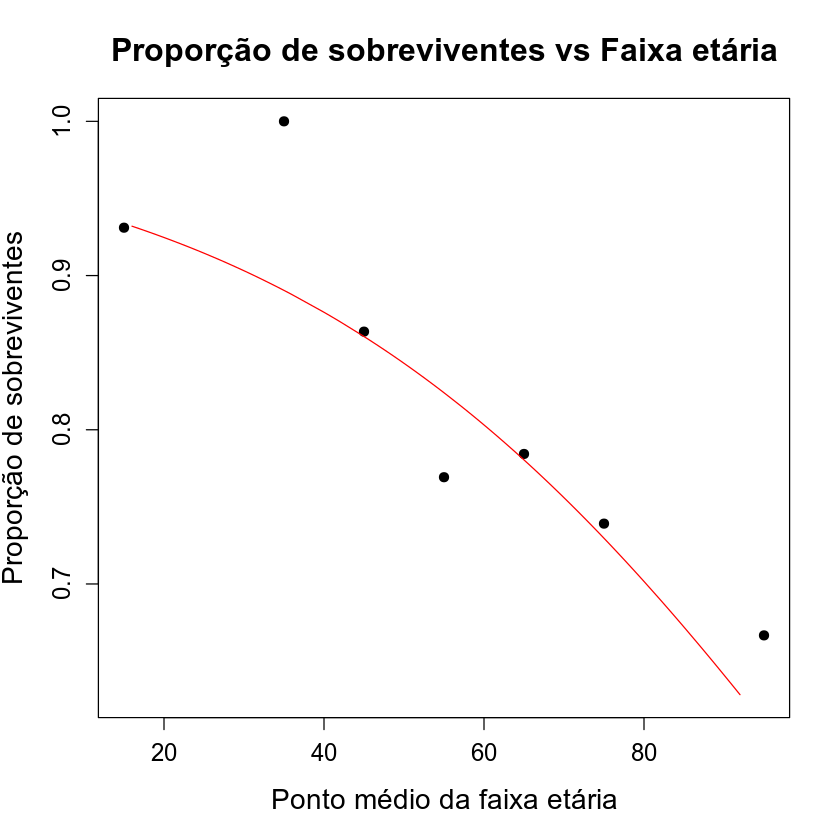

In [11]:
b<-c(30,40,50,60,70,80)
w<-findInterval(age,b)
aux<-aggregate(y,list(w),mean)
propGroup<-as.numeric(aux[,2])
ageGroup<-c(15,35,45,55,65,75,95)

yLim<-c(min(c(propGroup,muAj)),max(c(propGroup,muAj)))

I<-order(age)
plot(ageGroup,propGroup,pch=20,ylim=yLim,cex=1.5,xlab="Ponto médio da faixa etária",ylab="Proporção de sobreviventes",cex.lab=1.4,cex.main=1.6,main="Proporção de sobreviventes vs Faixa etária",cex.axis=1.2)
points(age[I],muAj[I],type="l",col="red")

### 8.5 Interpretação do modelo

<p style="text-align: justify;font-size: 16px">Visualizando as estimativas dos coeficientes de regressão e do parâmetro de dispersão.</p>

In [12]:
aux<-summary(aj)
beta<-aj$coefficients
print(beta)

(Intercept)         age 
 3.05851323 -0.02754261 


<p style="text-align: justify;font-size: 16px">Equação de regressão ajustada.</p>

<p style="text-align: justify;font-size: 22px">$\hat\mu=\frac{e^{3,0585-0,0275\cdot Idade}}{e^{3,0585-0,0275\cdot Idade}+1}\qquad\hbox{ou}\qquad\frac{\hat\mu}{1-\hat\mu}=odds(\hat\mu)=e^{3,0585-0,0275\cdot Idade}$.</p>

<p style="text-align: justify;font-size: 16px">Probabilidade de sobrevivência com 0 anos.</p>

In [13]:
exp(3.0585)/(exp(3.0585)+1)

[1] 0.9551481

<p style="text-align: justify;font-size: 16px">Calculando a exponencial dos coeficientes de regressão.</p>

In [14]:
print(exp(beta))

(Intercept)         age 
 21.2958716   0.9728332 


<p style="text-align: justify; font-size:16px">Interpretando os coeficientes de regressão. </p>
    <ol style="text-align: justify; font-size:16px">
        <li>Estima-se que pacientes com zero anos de idade sobrevivem com cerca de 96% de probabilidade.</li>
        <li>Como $\beta_1$ é negativo, quanto maior a idade, menor a probabilidade de sobrevivência.</li>
        <li>Quando a idade aumenta um ano, a chance fica 0,97 vezes menor. Ou seja, cada ano a 
            mais na idade do paciente reduz sua chance em 3%. A proabilidade de sobreviver fica 3% menor em relação a probabilidade de não sobreviver.</li>
    </ol>